## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Processing

In [2]:
#Loading U.S.A GDP 
us_gdp = pd.read_csv("GDP.csv")
us_gdp

,DATE,GDP
0,2000-01-01,10002.179
1,2000-04-01,10247.720
2,2000-07-01,10318.165
3,2000-10-01,10435.744
4,2001-01-01,10470.231
...,...,...
93,2023-04-01,27063.012
94,2023-07-01,27610.128
95,2023-10-01,27956.998
96,2024-01-01,28269.174


In [3]:
#dataset size and info
us_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    98 non-null     object 
 1   GDP     98 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [4]:
#statistical information
us_gdp.describe()

,GDP
count,98.000000
mean,17083.290398
std,4919.458278
min,10002.179000
25%,13637.726000
50%,16137.960000
75%,20255.686750
max,28629.153000


In [5]:
gdp_df = us_gdp.copy()
# Convert 'Date' column to datetime format
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'])

# Set 'Date' as the index
gdp_df.set_index('DATE', inplace=True)

# Create a date range that includes every month
full_date_range = pd.date_range(start=gdp_df.index.min(), end=gdp_df.index.max(), freq='MS')

# Reindex the dataframe to the new date range and fill missing GDP values with NaN
gdp_df = gdp_df.reindex(full_date_range, fill_value=np.nan)

# Reset index to get 'Date' as a column again
gdp_df.reset_index(inplace=True)
gdp_df.rename(columns={'index': 'DATE'}, inplace=True)
gdp_df

,DATE,GDP
0,2000-01-01,10002.179
1,2000-02-01,NaN
2,2000-03-01,NaN
3,2000-04-01,10247.720
4,2000-05-01,NaN
...,...,...
287,2023-12-01,NaN
288,2024-01-01,28269.174
289,2024-02-01,NaN
290,2024-03-01,NaN


GDP results are published quaterly. So, it needs to be converted to monthly basis by importing the quaterly value for each month.

In [6]:
#forward filling GDP values
gdp_df['GDP'] = gdp_df['GDP'].ffill()
gdp_df

,DATE,GDP
0,2000-01-01,10002.179
1,2000-02-01,10002.179
2,2000-03-01,10002.179
3,2000-04-01,10247.720
4,2000-05-01,10247.720
...,...,...
287,2023-12-01,27956.998
288,2024-01-01,28269.174
289,2024-02-01,28269.174
290,2024-03-01,28269.174


In [7]:
#Loading unemployment rate data
unemp = pd.read_csv("UNRATE.csv")
unemp

,DATE,UNRATE
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0
...,...,...
290,2024-03-01,3.8
291,2024-04-01,3.9
292,2024-05-01,4.0
293,2024-06-01,4.1


In [8]:
unemp["DATE"] = pd.to_datetime(unemp["DATE"])
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    295 non-null    datetime64[ns]
 1   UNRATE  295 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [9]:
# Merge the GDP dataframe with the Unemployment Rate dataframe on 'Date'
gdp_un = pd.merge(gdp_df, unemp, on='DATE', how='outer')

# Sort by Date (if not already sorted)
gdp_un = gdp_un.sort_values(by='DATE').reset_index(drop=True)
gdp_un

,DATE,GDP,UNRATE
0,2000-01-01,10002.179,4.0
1,2000-02-01,10002.179,4.1
2,2000-03-01,10002.179,4.0
3,2000-04-01,10247.720,3.8
4,2000-05-01,10247.720,4.0
...,...,...,...
290,2024-03-01,28269.174,3.8
291,2024-04-01,28629.153,3.9
292,2024-05-01,NaN,4.0
293,2024-06-01,NaN,4.1


In [10]:
#Loading Housing Price Index data
hpi = pd.read_csv("CSUSHPISA.csv")
hpi

,DATE,CSUSHPISA
0,2000-01-01,100.551
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.677
...,...,...
288,2024-01-01,315.787
289,2024-02-01,317.332
290,2024-03-01,318.308
291,2024-04-01,319.326


In [11]:
#Converting date column to datetime
hpi["DATE"] = pd.to_datetime(hpi["DATE"])
hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       293 non-null    datetime64[ns]
 1   CSUSHPISA  293 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [12]:
gdp_un_hpi = pd.merge(gdp_un, hpi, on='DATE', how='outer')

# Sort by Date (if not already sorted)
gdp_un_hpi = gdp_un_hpi.sort_values(by='DATE').reset_index(drop=True)
gdp_un_hpi

,DATE,GDP,UNRATE,CSUSHPISA
0,2000-01-01,10002.179,4.0,100.551
1,2000-02-01,10002.179,4.1,101.339
2,2000-03-01,10002.179,4.0,102.127
3,2000-04-01,10247.720,3.8,102.922
4,2000-05-01,10247.720,4.0,103.677
...,...,...,...,...
290,2024-03-01,28269.174,3.8,318.308
291,2024-04-01,28629.153,3.9,319.326
292,2024-05-01,NaN,4.0,320.144
293,2024-06-01,NaN,4.1,NaN


In [13]:
#Loading Consumer Price Index(CPI) data
cpi = pd.read_csv("CPALTT01USM657N.csv")
cpi

,DATE,CPALTT01USM657N
0,1/01/2000,0.297089
1,1/02/2000,0.592417
2,1/03/2000,0.824499
3,1/04/2000,0.058411
4,1/05/2000,0.116754
...,...,...
286,1/11/2023,-0.201514
287,1/12/2023,-0.099332
288,1/01/2024,0.544750
289,1/02/2024,0.618967


In [14]:
# Convert the 'Date' column to datetime format and store it in the desired format
cpi['DATE'] = pd.to_datetime(cpi['DATE'], format='%d/%m/%Y')
cpi

,DATE,CPALTT01USM657N
0,2000-01-01,0.297089
1,2000-02-01,0.592417
2,2000-03-01,0.824499
3,2000-04-01,0.058411
4,2000-05-01,0.116754
...,...,...
286,2023-11-01,-0.201514
287,2023-12-01,-0.099332
288,2024-01-01,0.544750
289,2024-02-01,0.618967


In [15]:
gdp_un_hpi_cpi = pd.merge(gdp_un_hpi, cpi, on='DATE', how='outer')

# Sort by Date (if not already sorted)
gdp_un_hpi_cpi = gdp_un_hpi_cpi.sort_values(by='DATE').reset_index(drop=True)
gdp_un_hpi_cpi

,DATE,GDP,UNRATE,CSUSHPISA,CPALTT01USM657N
0,2000-01-01,10002.179,4.0,100.551,0.297089
1,2000-02-01,10002.179,4.1,101.339,0.592417
2,2000-03-01,10002.179,4.0,102.127,0.824499
3,2000-04-01,10247.720,3.8,102.922,0.058411
4,2000-05-01,10247.720,4.0,103.677,0.116754
...,...,...,...,...,...
290,2024-03-01,28269.174,3.8,318.308,0.646417
291,2024-04-01,28629.153,3.9,319.326,NaN
292,2024-05-01,NaN,4.0,320.144,NaN
293,2024-06-01,NaN,4.1,NaN,NaN


In [16]:
#Loading Industrial Production measure dataset
ind = pd.read_csv("INDPRO.csv")
ind

,DATE,INDPRO
0,2000-01-01,91.4092
1,2000-02-01,91.7245
2,2000-03-01,92.0830
3,2000-04-01,92.6659
4,2000-05-01,92.9347
...,...,...
289,2024-02-01,102.6045
290,2024-03-01,102.4062
291,2024-04-01,102.4329
292,2024-05-01,103.3282


In [17]:
ind["DATE"] = pd.to_datetime(ind["DATE"])
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    294 non-null    datetime64[ns]
 1   INDPRO  294 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [18]:
eco_ind_us = pd.merge(gdp_un_hpi_cpi, ind, on='DATE', how='outer')

# Sort by Date (if not already sorted)
eco_ind_us = eco_ind_us.sort_values(by='DATE').reset_index(drop=True)
eco_ind_us

,DATE,GDP,UNRATE,CSUSHPISA,CPALTT01USM657N,INDPRO
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347
...,...,...,...,...,...,...
290,2024-03-01,28269.174,3.8,318.308,0.646417,102.4062
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941


In [19]:
#Loading Australian Security Exchange(ASX) dataset
asx = pd.read_csv("S&P_ASX 200 Historical Data.csv")
asx

,Date,Price,Open,High,Low,Vol.,Change %
0,01/08/2024,"7,813.70","8,092.30","8,148.70","7,628.10",5.47B,-3.44%
1,01/07/2024,"8,092.30","7,767.50","8,092.30","7,702.50",12.79B,4.18%
2,01/06/2024,"7,767.50","7,701.70","7,861.80","7,654.20",12.75B,0.85%
3,01/05/2024,"7,701.70","7,664.10","7,900.20","7,556.50",13.66B,0.49%
4,01/04/2024,"7,664.10","7,896.90","7,910.50","7,492.60",11.63B,-2.95%
...,...,...,...,...,...,...,...
291,01/05/2000,"3,081.00","3,115.80","3,131.90","2,985.70",NaN,-1.12%
292,01/04/2000,"3,115.80","3,133.30","3,201.40","2,902.10",NaN,-0.56%
293,01/03/2000,"3,133.30","3,133.30","3,133.30","3,133.30",NaN,0.28%
294,01/02/2000,"3,124.60","3,124.60","3,124.60","3,124.60",NaN,1.44%


In [20]:
# Convert the 'Date' column to datetime format and store it in the yyyy-mm-dd format
asx['Date'] = pd.to_datetime(asx['Date'], format='%d/%m/%Y')
asx

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-08-01,"7,813.70","8,092.30","8,148.70","7,628.10",5.47B,-3.44%
1,2024-07-01,"8,092.30","7,767.50","8,092.30","7,702.50",12.79B,4.18%
2,2024-06-01,"7,767.50","7,701.70","7,861.80","7,654.20",12.75B,0.85%
3,2024-05-01,"7,701.70","7,664.10","7,900.20","7,556.50",13.66B,0.49%
4,2024-04-01,"7,664.10","7,896.90","7,910.50","7,492.60",11.63B,-2.95%
...,...,...,...,...,...,...,...
291,2000-05-01,"3,081.00","3,115.80","3,131.90","2,985.70",NaN,-1.12%
292,2000-04-01,"3,115.80","3,133.30","3,201.40","2,902.10",NaN,-0.56%
293,2000-03-01,"3,133.30","3,133.30","3,133.30","3,133.30",NaN,0.28%
294,2000-02-01,"3,124.60","3,124.60","3,124.60","3,124.60",NaN,1.44%


In [21]:
def convert_volume(value):
  if isinstance(value, str):
    if value[-1] == 'B':
      return float(value[:-1]) * 1000000000
    elif value[-1] == 'M':
      return float(value[:-1]) * 1000000
    else:
      return float(value)
  else:
    return value


asx['Vol.'] = asx['Vol.'].apply(convert_volume)
asx

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-08-01,"7,813.70","8,092.30","8,148.70","7,628.10",5.470000e+09,-3.44%
1,2024-07-01,"8,092.30","7,767.50","8,092.30","7,702.50",1.279000e+10,4.18%
2,2024-06-01,"7,767.50","7,701.70","7,861.80","7,654.20",1.275000e+10,0.85%
3,2024-05-01,"7,701.70","7,664.10","7,900.20","7,556.50",1.366000e+10,0.49%
4,2024-04-01,"7,664.10","7,896.90","7,910.50","7,492.60",1.163000e+10,-2.95%
...,...,...,...,...,...,...,...
291,2000-05-01,"3,081.00","3,115.80","3,131.90","2,985.70",NaN,-1.12%
292,2000-04-01,"3,115.80","3,133.30","3,201.40","2,902.10",NaN,-0.56%
293,2000-03-01,"3,133.30","3,133.30","3,133.30","3,133.30",NaN,0.28%
294,2000-02-01,"3,124.60","3,124.60","3,124.60","3,124.60",NaN,1.44%


In [22]:
asx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      296 non-null    datetime64[ns]
 1   Price     296 non-null    object        
 2   Open      296 non-null    object        
 3   High      296 non-null    object        
 4   Low       296 non-null    object        
 5   Vol.      254 non-null    float64       
 6   Change %  296 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 16.3+ KB


In [23]:
# Remove commas and convert columns to float
columns_to_convert = ['Price', 'Open', 'High', 'Low']

for col in columns_to_convert:
    # Remove commas
    asx[col] = asx[col].str.replace(',', '', regex=True)
    # Convert to float
    asx[col] = asx[col].astype(float)
asx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      296 non-null    datetime64[ns]
 1   Price     296 non-null    float64       
 2   Open      296 non-null    float64       
 3   High      296 non-null    float64       
 4   Low       296 non-null    float64       
 5   Vol.      254 non-null    float64       
 6   Change %  296 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 16.3+ KB


In [24]:
asx.rename(columns = {"Date": "DATE"}, inplace=True)
asx

,DATE,Price,Open,High,Low,Vol.,Change %
0,2024-08-01,7813.7,8092.3,8148.7,7628.1,5.470000e+09,-3.44%
1,2024-07-01,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%
2,2024-06-01,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%
3,2024-05-01,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%
4,2024-04-01,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%
...,...,...,...,...,...,...,...
291,2000-05-01,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%
292,2000-04-01,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%
293,2000-03-01,3133.3,3133.3,3133.3,3133.3,NaN,0.28%
294,2000-02-01,3124.6,3124.6,3124.6,3124.6,NaN,1.44%


In [25]:
eco_ind_us_asx = pd.merge(eco_ind_us, asx, on='DATE', how='outer')

# Sort by Date (if not already sorted)
eco_ind_us_asx = eco_ind_us_asx.sort_values(by='DATE').reset_index(drop=True)
eco_ind_us_asx

,DATE,GDP,UNRATE,CSUSHPISA,CPALTT01USM657N,INDPRO,Price,Open,High,Low,Vol.,Change %
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%


In [26]:
#Renaming column names for better readability
eco_ind_us_asx.rename(columns = {"CSUSHPISA": "US_HousingPriceIndex", "CPALTT01USM657N": "US_CPI", "GDP": "US_GDP",
                                "INDPRO": "US_INDPRO", "Vol.":"Volume", "UNRATE": "US_UNRATE"}, inplace=True)
eco_ind_us_asx

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%
...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%


In [27]:
eco_ind_us_asx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  296 non-null    datetime64[ns]
 1   US_GDP                292 non-null    float64       
 2   US_UNRATE             295 non-null    float64       
 3   US_HousingPriceIndex  293 non-null    float64       
 4   US_CPI                291 non-null    float64       
 5   US_INDPRO             294 non-null    float64       
 6   Price                 296 non-null    float64       
 7   Open                  296 non-null    float64       
 8   High                  296 non-null    float64       
 9   Low                   296 non-null    float64       
 10  Volume                254 non-null    float64       
 11  Change %              296 non-null    object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 27.9+ KB


In [28]:
#Converting Change% to float
eco_ind_us_asx['Change'] = eco_ind_us_asx['Change %'].str.rstrip('%').astype('float') / 100
eco_ind_us_asx

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%,-0.0120
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%,0.0144
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%,0.0028
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%,-0.0056
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%,-0.0112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418


In [29]:
#Loading US Recession dataset
rec = pd.read_csv("USREC.csv")
rec

,DATE,USREC
0,2000-01-01,0
1,2000-02-01,0
2,2000-03-01,0
3,2000-04-01,0
4,2000-05-01,0
...,...,...
290,2024-03-01,0
291,2024-04-01,0
292,2024-05-01,0
293,2024-06-01,0


In [30]:
rec["DATE"] = pd.to_datetime(rec["DATE"])
rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    295 non-null    datetime64[ns]
 1   USREC   295 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.7 KB


In [31]:
stock_df = pd.merge(eco_ind_us_asx, rec, on='DATE', how='outer')

# Sort by Date (if not already sorted)
stock_df = stock_df.sort_values(by='DATE').reset_index(drop=True)
stock_df

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,NaN,-1.20%,-0.0120,0.0
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,NaN,1.44%,0.0144,0.0
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,NaN,0.28%,0.0028,0.0
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,NaN,-0.56%,-0.0056,0.0
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,NaN,-1.12%,-0.0112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085,0.0
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418,0.0


### Handling Missing Values

In [32]:
stock_df.isnull().sum()

DATE                     0
US_GDP                   4
US_UNRATE                1
US_HousingPriceIndex     3
US_CPI                   5
US_INDPRO                2
Price                    0
Open                     0
High                     0
Low                      0
Volume                  42
Change %                 0
Change                   0
USREC                    1
dtype: int64

In [33]:
#Filling missing value with mean for numerical values
stock_df['Open'] = stock_df['Open'].fillna(stock_df['Open'].mean())
stock_df['High'] = stock_df['High'].fillna(stock_df['High'].mean())
stock_df['Low'] = stock_df['Low'].fillna(stock_df['Low'].mean())
stock_df['Price'] = stock_df['Price'].fillna(stock_df['Price'].mean())
stock_df['Volume'] = stock_df['Volume'].fillna(stock_df['Volume'].mean())
stock_df

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC
0,2000-01-01,10002.179,4.0,100.551,0.297089,91.4092,3080.2,3080.2,3080.2,3080.2,1.458555e+10,-1.20%,-0.0120,0.0
1,2000-02-01,10002.179,4.1,101.339,0.592417,91.7245,3124.6,3124.6,3124.6,3124.6,1.458555e+10,1.44%,0.0144,0.0
2,2000-03-01,10002.179,4.0,102.127,0.824499,92.0830,3133.3,3133.3,3133.3,3133.3,1.458555e+10,0.28%,0.0028,0.0
3,2000-04-01,10247.720,3.8,102.922,0.058411,92.6659,3115.8,3133.3,3201.4,2902.1,1.458555e+10,-0.56%,-0.0056,0.0
4,2000-05-01,10247.720,4.0,103.677,0.116754,92.9347,3081.0,3115.8,3131.9,2985.7,1.458555e+10,-1.12%,-0.0112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326,NaN,102.4329,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0
292,2024-05-01,NaN,4.0,320.144,NaN,103.3282,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0
293,2024-06-01,NaN,4.1,NaN,NaN,103.9941,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085,0.0
294,2024-07-01,NaN,4.3,NaN,NaN,NaN,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418,0.0


In [34]:
stock_df.isnull().sum()

DATE                    0
US_GDP                  4
US_UNRATE               1
US_HousingPriceIndex    3
US_CPI                  5
US_INDPRO               2
Price                   0
Open                    0
High                    0
Low                     0
Volume                  0
Change %                0
Change                  0
USREC                   1
dtype: int64

In [35]:
#Filling missing values with forward/backward fill (suitable for time series data)
stock_df['US_UNRATE'] = stock_df['US_UNRATE'].fillna(method='ffill')
stock_df['US_GDP'] = stock_df['US_GDP'].fillna(method='ffill')  # Forward fill for the first missing value
stock_df['US_CPI'] = stock_df['US_CPI'].fillna(stock_df['US_CPI'].mean())  # Use mean for the last missing value
stock_df['US_HousingPriceIndex'] = stock_df['US_HousingPriceIndex'].fillna(stock_df['US_HousingPriceIndex'].mean())
stock_df['US_INDPRO'] = stock_df['US_INDPRO'].fillna(stock_df['US_INDPRO'].mean())

In [36]:
stock_df.isnull().sum()

DATE                    0
US_GDP                  0
US_UNRATE               0
US_HousingPriceIndex    0
US_CPI                  0
US_INDPRO               0
Price                   0
Open                    0
High                    0
Low                     0
Volume                  0
Change %                0
Change                  0
USREC                   1
dtype: int64

In [37]:
stock_df

,DATE,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC
0,2000-01-01,10002.179,4.0,100.551000,0.297089,91.409200,3080.2,3080.2,3080.2,3080.2,1.458555e+10,-1.20%,-0.0120,0.0
1,2000-02-01,10002.179,4.1,101.339000,0.592417,91.724500,3124.6,3124.6,3124.6,3124.6,1.458555e+10,1.44%,0.0144,0.0
2,2000-03-01,10002.179,4.0,102.127000,0.824499,92.083000,3133.3,3133.3,3133.3,3133.3,1.458555e+10,0.28%,0.0028,0.0
3,2000-04-01,10247.720,3.8,102.922000,0.058411,92.665900,3115.8,3133.3,3201.4,2902.1,1.458555e+10,-0.56%,-0.0056,0.0
4,2000-05-01,10247.720,4.0,103.677000,0.116754,92.934700,3081.0,3115.8,3131.9,2985.7,1.458555e+10,-1.12%,-0.0112,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2024-04-01,28629.153,3.9,319.326000,0.213456,102.432900,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0
292,2024-05-01,28629.153,4.0,320.144000,0.213456,103.328200,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0
293,2024-06-01,28629.153,4.1,179.853201,0.213456,103.994100,7767.5,7701.7,7861.8,7654.2,1.275000e+10,0.85%,0.0085,0.0
294,2024-07-01,28629.153,4.3,179.853201,0.213456,97.156722,8092.3,7767.5,8092.3,7702.5,1.279000e+10,4.18%,0.0418,0.0


In [38]:
stock_df.dropna(inplace=True)

## EDA

### Univariate Analysis

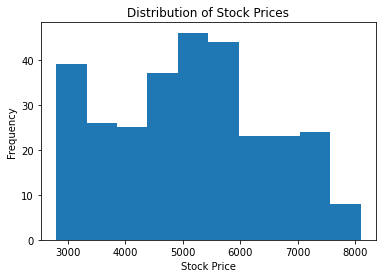

In [39]:
# Distribution of Stock Prices
plt.hist(stock_df['Price'])
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices')
plt.show()

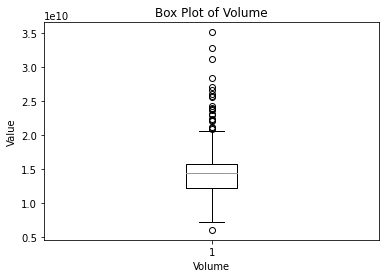

In [40]:
# Box Plot of Volume
plt.boxplot(stock_df['Volume'])
plt.xlabel('Volume')
plt.ylabel('Value')
plt.title('Box Plot of Volume')
plt.show()

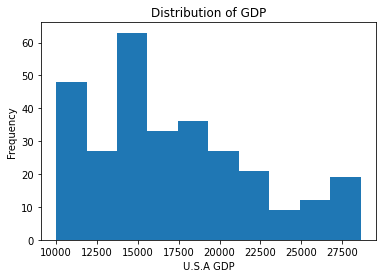

In [41]:
# Distribution of GDP
plt.hist(stock_df['US_GDP'])
plt.xlabel('U.S.A GDP')
plt.ylabel('Frequency')
plt.title('Distribution of GDP')
plt.show()

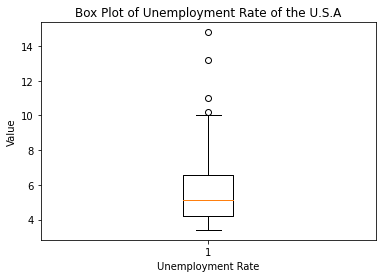

In [42]:
# Box Plot of Volume
plt.boxplot(stock_df['US_UNRATE'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Value')
plt.title('Box Plot of Unemployment Rate of the U.S.A')
plt.show()

### Bivariate Analysis 

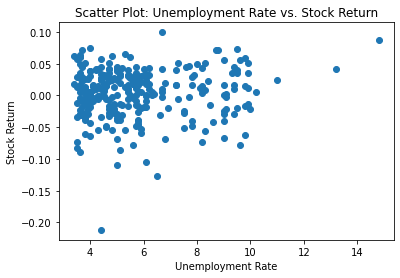

In [43]:
# Scatter Plot of Unemployment Rate vs. Stock Returns
plt.scatter(stock_df['US_UNRATE'], stock_df['Change'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Return')
plt.title('Scatter Plot: Unemployment Rate vs. Stock Return')
plt.show()

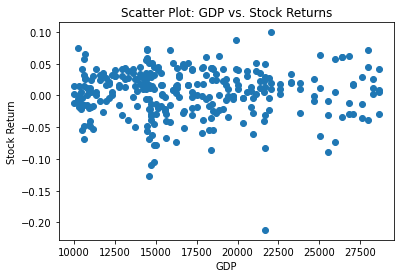

In [44]:
# Scatter Plot of GDP vs. Stock Returns
plt.scatter(stock_df['US_GDP'], stock_df['Change'])
plt.xlabel('GDP')
plt.ylabel('Stock Return')
plt.title('Scatter Plot: GDP vs. Stock Returns')
plt.show()

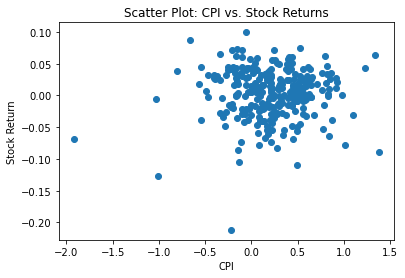

In [45]:
# Scatter Plot of CPI vs. Stock Returns
plt.scatter(stock_df['US_CPI'], stock_df['Change'])
plt.xlabel('CPI')
plt.ylabel('Stock Return')
plt.title('Scatter Plot: CPI vs. Stock Returns')
plt.show()

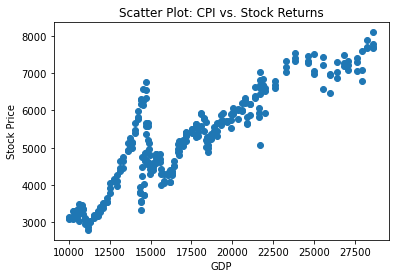

In [46]:
# Scatter Plot of CPI vs. Stock Returns
plt.scatter(stock_df['US_GDP'], stock_df['Price'])
plt.xlabel('GDP')
plt.ylabel('Stock Price')
plt.title('Scatter Plot: CPI vs. Stock Returns')
plt.show()

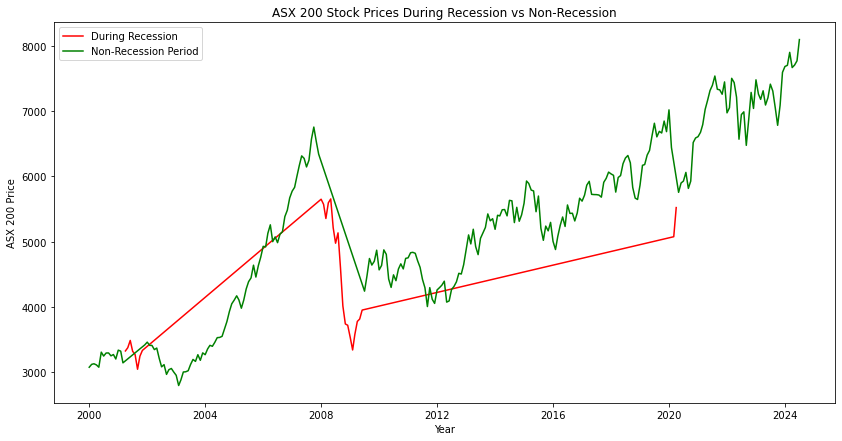

In [47]:
# Filter the data for recession and non-recession periods
recession_data = stock_df[stock_df['USREC'] == 1]
non_recession_data = stock_df[stock_df['USREC'] == 0]

# Plot the stock prices
plt.figure(figsize=(14, 7))
plt.plot(recession_data['DATE'], recession_data['Price'], label='During Recession', color='red')
plt.plot(non_recession_data['DATE'], non_recession_data['Price'], label='Non-Recession Period', color='green')
plt.title('ASX 200 Stock Prices During Recession vs Non-Recession')
plt.xlabel('Year')
plt.ylabel('ASX 200 Price')
plt.legend()
plt.show()

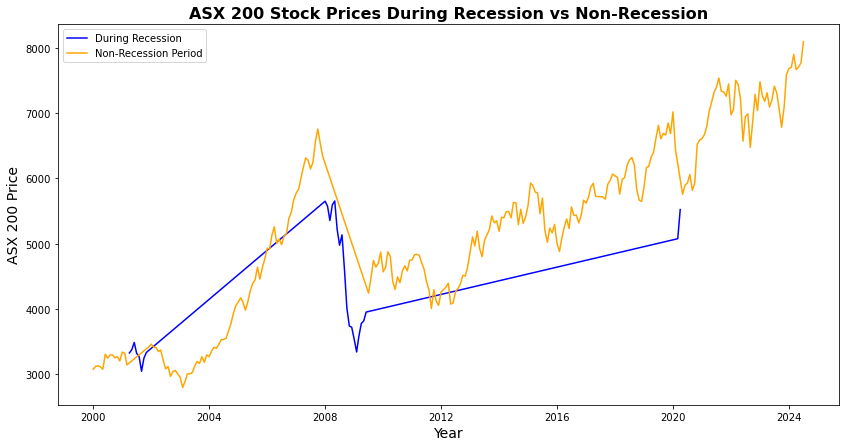

In [48]:
# Filter the data for recession and non-recession periods
recession_data = stock_df[stock_df['USREC'] == 1]
non_recession_data = stock_df[stock_df['USREC'] == 0]

# Plot the stock prices
plt.figure(figsize=(14, 7))
plt.plot(recession_data['DATE'], recession_data['Price'], label='During Recession', color='blue')  # Changed to blue
plt.plot(non_recession_data['DATE'], non_recession_data['Price'], label='Non-Recession Period', color='orange')  # Changed to orange
plt.title('ASX 200 Stock Prices During Recession vs Non-Recession', fontsize=16, fontweight='bold')  # Increased font size and bold
plt.xlabel('Year', fontsize=14)  # Increased font size
plt.ylabel('ASX 200 Price', fontsize=14)  # Increased font size
plt.legend()
plt.show()

During recession periods, the stock prices tend to either decline or remain relatively stagnant compared to non-recession periods where there is a noticeable upward trend.

This suggests that recessions, as expected, have a negative impact on the ASX 200 stock prices, reflecting the broader economic downturn during these periods.

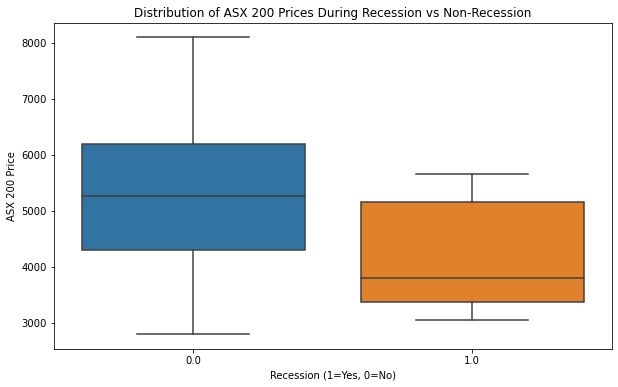

In [49]:
# Boxplot for recession vs non-recession
plt.figure(figsize=(10, 6))
sns.boxplot(x='USREC', y='Price', data=stock_df)
plt.title('Distribution of ASX 200 Prices During Recession vs Non-Recession')
plt.xlabel('Recession (1=Yes, 0=No)')
plt.ylabel('ASX 200 Price')
plt.show()

The boxplot shows the distribution of ASX 200 stock prices during recession (1) and non-recession (0) periods. The median stock price during recessions is noticeably lower compared to non-recession periods. The interquartile range (IQR) is also narrower during recessions, indicating less variability in stock prices when the economy is contracting. The overall trend suggests that the ASX 200 index tends to drop and stabilize at lower levels during recessions compared to more varied and higher prices in non-recession times. This indicates a negative impact of recessions on the stock market.

### Time series analysis 

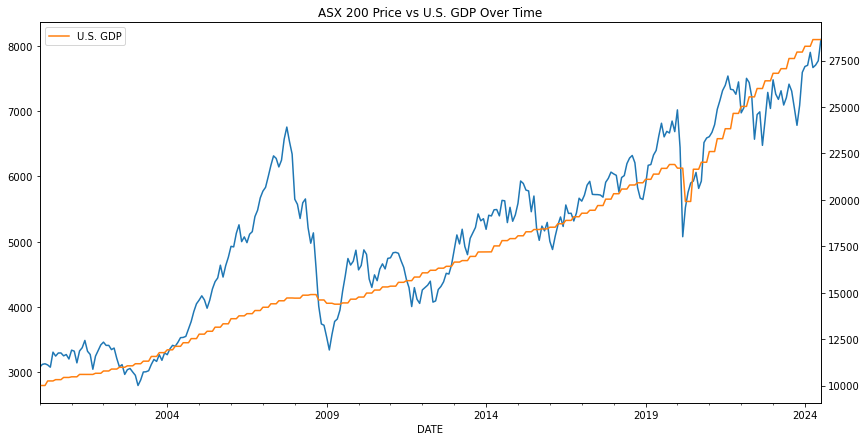

In [50]:
#Time series analysis
# Plot ASX 200 Price and U.S. Economic Indicators
stock_df.set_index('DATE', inplace=True)
plt.figure(figsize=(14, 7))
stock_df['Price'].plot(label='ASX 200 Price')
stock_df['US_GDP'].plot(secondary_y=True, label='U.S. GDP')
plt.title('ASX 200 Price vs U.S. GDP Over Time')
plt.legend()
plt.show()


The plot of ASX 200 Price vs. U.S. GDP over time shows a general upward trend in both the ASX 200 stock prices and U.S. GDP, indicating a positive correlation between the two. However, there are periods where the ASX 200 experiences sharp declines, such as during the 2008 financial crisis, even as U.S. GDP continues to rise steadily. This suggests that while U.S. GDP growth contributes to overall market confidence, external factors (like global economic downturns) can cause significant volatility in the ASX 200, independent of GDP trends.

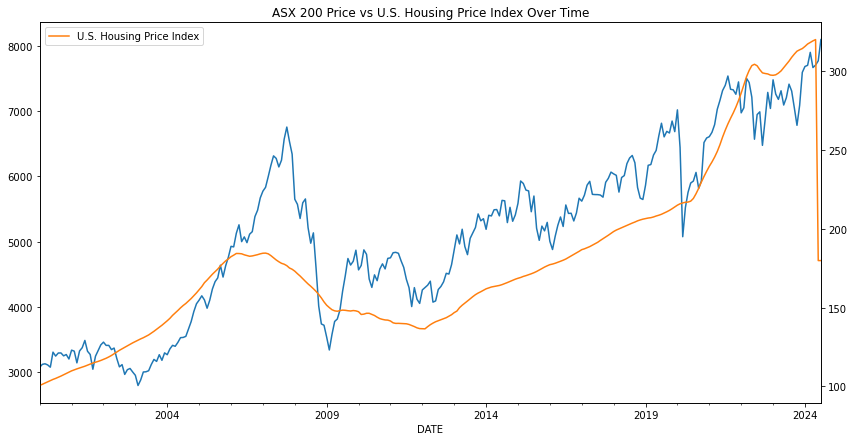

In [51]:
#Time series analysis
# Plot ASX 200 Price and U.S. Economic Indicators
#stock_df.set_index('DATE', inplace=True)
plt.figure(figsize=(14, 7))
stock_df['Price'].plot(label='ASX 200 Price')
stock_df['US_HousingPriceIndex'].plot(secondary_y=True, label='U.S. Housing Price Index')
plt.title('ASX 200 Price vs U.S. Housing Price Index Over Time')
plt.legend()
plt.show()

The plot of ASX 200 Price vs. U.S. Housing Price Index over time shows that both the Australian stock market (ASX 200) and the U.S. Housing Price Index generally trend upward, with noticeable drops during economic downturns, particularly around 2008. The ASX 200 appears more volatile with sharper peaks and troughs, while the U.S. Housing Price Index follows a more gradual incline. This suggests that while there is a general positive correlation between the two, the ASX 200 is more sensitive to market fluctuations and global economic conditions.

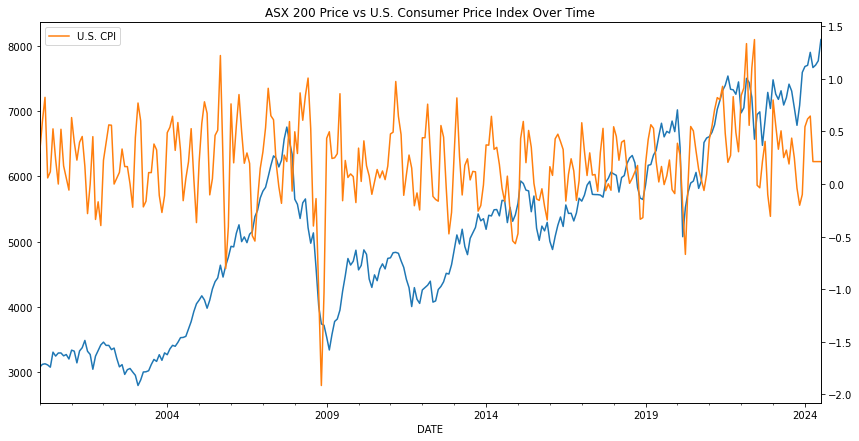

In [52]:
# Plot ASX 200 Price and U.S. Economic Indicators

plt.figure(figsize=(14, 7))
stock_df['Price'].plot(label='ASX 200 Price')
stock_df['US_CPI'].plot(secondary_y=True, label='U.S. CPI')
plt.title('ASX 200 Price vs U.S. Consumer Price Index Over Time')
plt.legend()
plt.show()

The plot of ASX 200 Price vs. U.S. Consumer Price Index (CPI) over time indicates that while both the ASX 200 and CPI exhibit fluctuations, they do not have a clear direct relationship

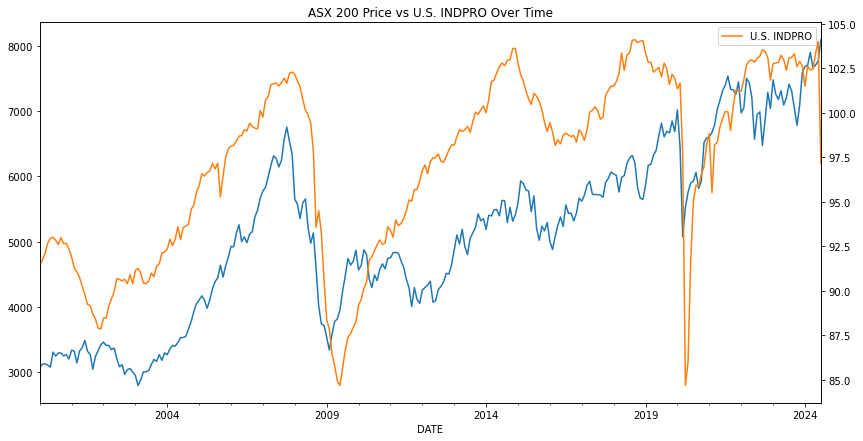

In [53]:
# Plot ASX 200 Price and U.S. Economic Indicators

plt.figure(figsize=(14, 7))
stock_df['Price'].plot(label='ASX 200 Price')
stock_df['US_INDPRO'].plot(secondary_y=True, label='U.S. INDPRO')
plt.title('ASX 200 Price vs U.S. INDPRO Over Time')
plt.legend()
plt.show()

The plot of ASX 200 Price vs. U.S. Industrial Production Index (INDPRO) over time shows a strong positive correlation between the two metrics. Both the ASX 200 index and INDPRO generally rise and fall together, indicating that industrial production in the U.S. has a significant influence on the Australian stock market. Sharp declines in INDPRO, such as during the 2008 financial crisis, are mirrored by corresponding drops in the ASX 200 index. This suggests that U.S. industrial activity is a key driver of global economic confidence, impacting stock markets like the ASX 200.

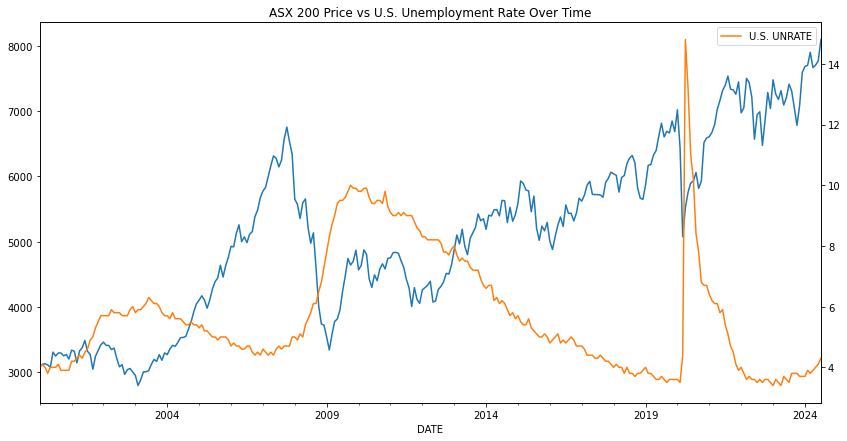

In [54]:
# Plot ASX 200 Price and U.S. Economic Indicators

plt.figure(figsize=(14, 7))
stock_df['Price'].plot(label='ASX 200 Price')
stock_df['US_UNRATE'].plot(secondary_y=True, label='U.S. UNRATE')
plt.title('ASX 200 Price vs U.S. Unemployment Rate Over Time')
plt.legend()
plt.show()

### Correlation Analysis

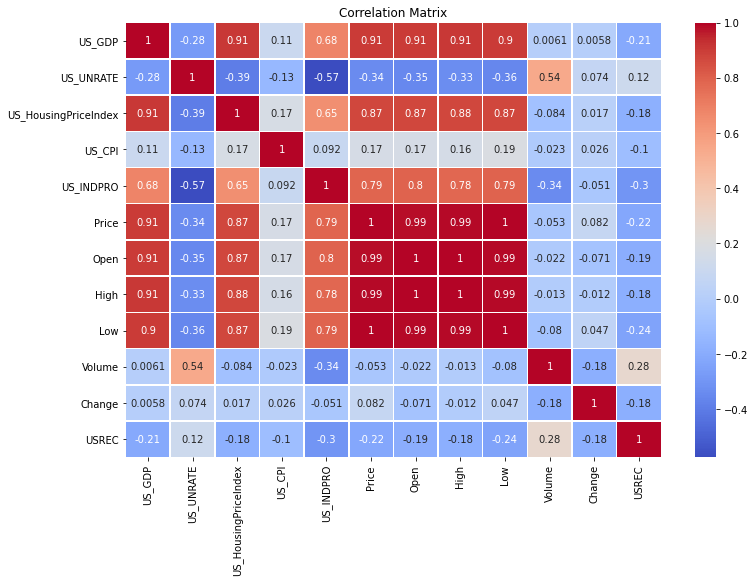

In [55]:
# Calculate correlation matrix
correlation_matrix = stock_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

GDP, Housing Price Index, INDPRO values have high correlation with stock prices

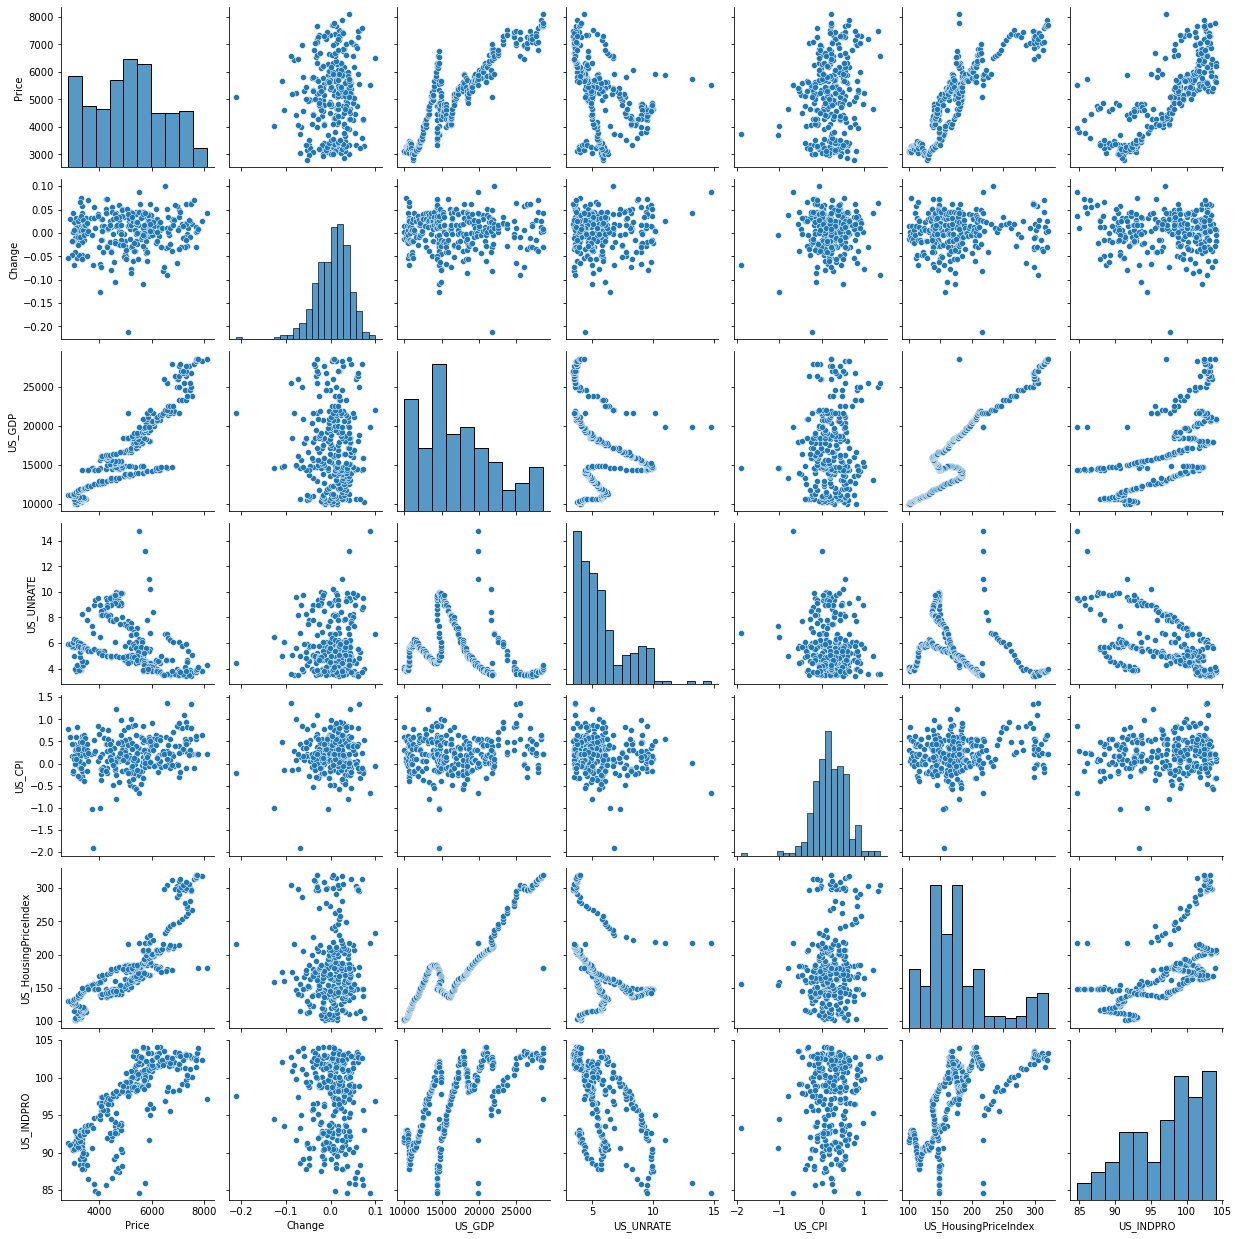

In [56]:
#Pair plot
columns_to_plot = ['Price', 'Change', 'US_GDP', 'US_UNRATE', 'US_CPI', "US_HousingPriceIndex", "US_INDPRO"]

# Pair plot
sns.pairplot(stock_df[columns_to_plot])
plt.show()

### Standardization

In [57]:
#Standardization
# Features (X) and Target (y)
X = stock_df[['US_GDP', 'US_HousingPriceIndex', 'US_INDPRO', 'US_UNRATE', 'US_CPI']]
y = stock_df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train

array([[-0.49381806, -0.1712259 ,  0.94321562, -0.41158207,  0.16183267],
       [-0.84962283, -0.24503717, -0.09964761, -0.26012672,  1.11048652],
       [-1.3130884 , -1.24524666, -1.48994257, -0.61352255, -0.14002214],
       ...,
       [-0.5134303 , -0.45275822, -0.78388143,  0.54763519, -5.31407689],
       [ 1.75765381,  2.24172807,  1.20183693, -1.11837374, -0.58847153],
       [-0.45543069, -0.31703836,  0.46524594,  0.042784  ,  0.74447773]])

### Prediction - Analyze the impact of U.S. economic indicators on Australian stock market performance and predict the stock prices

### Linear Regression

Linear Regression RMSE: 475.92611582238527
Linear Regression R^2: 0.8603188784508111


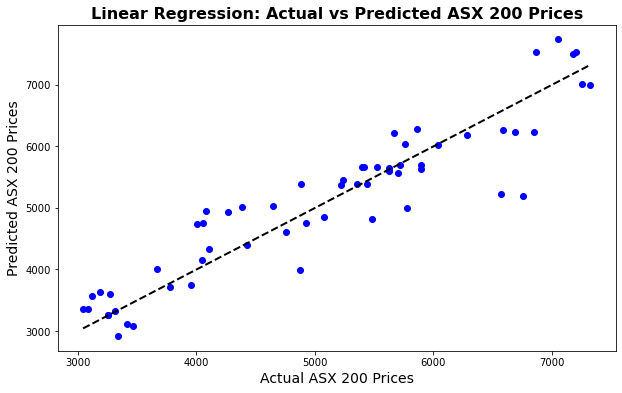

In [70]:
# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print(f"Linear Regression RMSE: {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lr)}")

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual ASX 200 Prices', fontsize=14)
plt.ylabel('Predicted ASX 200 Prices', fontsize=14)
plt.title('Linear Regression: Actual vs Predicted ASX 200 Prices',fontsize=16, fontweight='bold')
plt.show()

### Random Forest Model

Random Forest RMSE: 159.28383387382007
Random Forest R^2: 0.9843540463034253


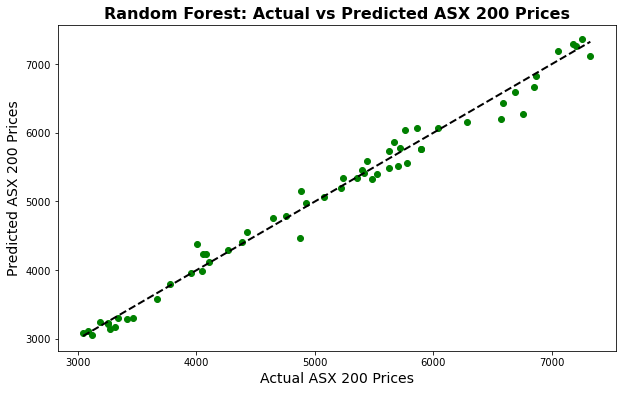

In [71]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=90, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print(f"Random Forest RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")
print(f"Random Forest R^2: {r2_score(y_test, y_pred_rf)}")

# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual ASX 200 Prices',fontsize=14)
plt.ylabel('Predicted ASX 200 Prices',fontsize=14)
plt.title('Random Forest: Actual vs Predicted ASX 200 Prices',fontsize=16, fontweight='bold')
plt.show()

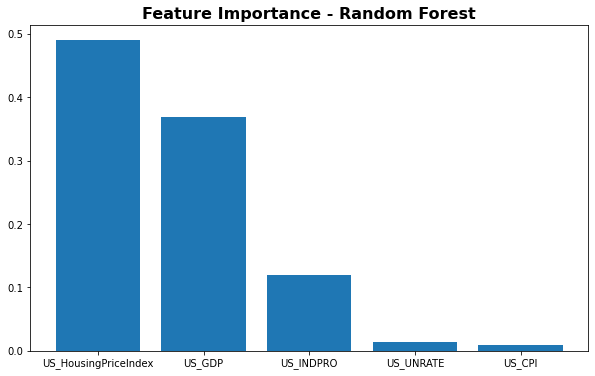

In [72]:
# Feature importance Random Forest Model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest",fontsize=16, fontweight='bold')
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.show()

### Classification - classify whether the stock price will increase or decrease based on the U.S. economic indicators

In [62]:
# Feature Engineering: Add a binary target variable based on the 'Change %' column
stock_df['Target'] = np.where(stock_df['Change'] > 0, 1, 0)
stock_df

,US_GDP,US_UNRATE,US_HousingPriceIndex,US_CPI,US_INDPRO,Price,Open,High,Low,Volume,Change %,Change,USREC,Target
DATE,,,,,,,,,,,,,,
2000-01-01,10002.179,4.0,100.551000,0.297089,91.409200,3080.2,3080.2,3080.2,3080.2,1.458555e+10,-1.20%,-0.0120,0.0,0
2000-02-01,10002.179,4.1,101.339000,0.592417,91.724500,3124.6,3124.6,3124.6,3124.6,1.458555e+10,1.44%,0.0144,0.0,1
2000-03-01,10002.179,4.0,102.127000,0.824499,92.083000,3133.3,3133.3,3133.3,3133.3,1.458555e+10,0.28%,0.0028,0.0,1
2000-04-01,10247.720,3.8,102.922000,0.058411,92.665900,3115.8,3133.3,3201.4,2902.1,1.458555e+10,-0.56%,-0.0056,0.0,0
2000-05-01,10247.720,4.0,103.677000,0.116754,92.934700,3081.0,3115.8,3131.9,2985.7,1.458555e+10,-1.12%,-0.0112,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,28269.174,3.8,318.308000,0.646417,102.406200,7896.9,7698.7,7901.2,7591.4,1.458000e+10,2.57%,0.0257,0.0,1
2024-04-01,28629.153,3.9,319.326000,0.213456,102.432900,7664.1,7896.9,7910.5,7492.6,1.163000e+10,-2.95%,-0.0295,0.0,0
2024-05-01,28629.153,4.0,320.144000,0.213456,103.328200,7701.7,7664.1,7900.2,7556.5,1.366000e+10,0.49%,0.0049,0.0,1


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [64]:
# Features and target
features = ['US_GDP', 'US_UNRATE', 'US_HousingPriceIndex', 'US_CPI', 'US_INDPRO', 'USREC']
X_class = stock_df[features]
y_class = stock_df['Target']

# Train-test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_class, y_train_class)
y_pred_log_reg = log_reg.predict(X_test_class)
y_prob_log_reg = log_reg.predict_proba(X_test_class)[:, 1]

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_class, y_train_class)
y_pred_rf = rf_clf.predict(X_test_class)
y_prob_rf = rf_clf.predict_proba(X_test_class)[:, 1]



Logistic Regression Model Evaluation:
Accuracy: 0.57
Precision: 0.58
Recall: 0.92
F1 Score: 0.71
Confusion Matrix:
[[ 4 34]
 [ 4 47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.11      0.17        38
           1       0.58      0.92      0.71        51

    accuracy                           0.57        89
   macro avg       0.54      0.51      0.44        89
weighted avg       0.55      0.57      0.48        89

Random Forest Model Evaluation:
Accuracy: 0.51
Precision: 0.56
Recall: 0.63
F1 Score: 0.59
Confusion Matrix:
[[13 25]
 [19 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.34      0.37        38
           1       0.56      0.63      0.59        51

    accuracy                           0.51        89
   macro avg       0.48      0.48      0.48        89
weighted avg       0.50      0.51      0.50        89



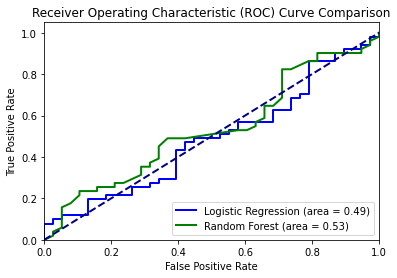

In [65]:
# Evaluation Metrics
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Evaluate Logistic Regression
fpr_log_reg, tpr_log_reg, roc_auc_log_reg = evaluate_model(y_test_class, y_pred_log_reg, y_prob_log_reg, "Logistic Regression")

# Evaluate Random Forest Classifier
fpr_rf, tpr_rf, roc_auc_rf = evaluate_model(y_test_class, y_pred_rf, y_prob_rf, "Random Forest")

# Plotting both ROC curves in the same plot for comparison
plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

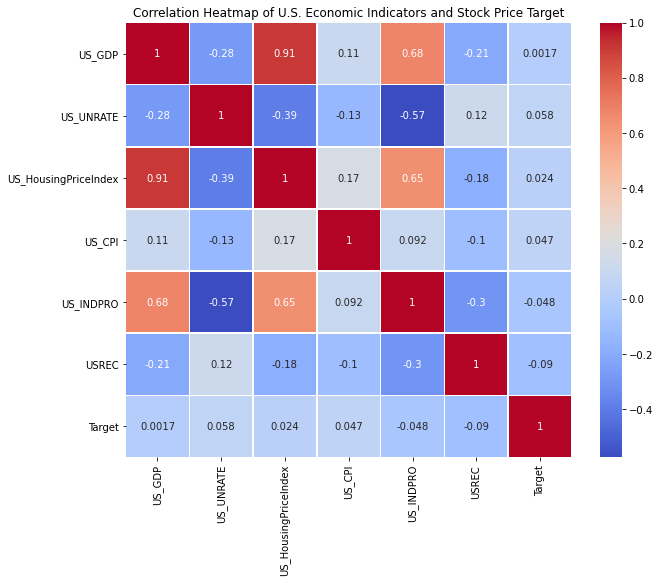

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = stock_df[['US_GDP', 'US_UNRATE', 'US_HousingPriceIndex', 'US_CPI', 'US_INDPRO', 'USREC', 'Target']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of U.S. Economic Indicators and Stock Price Target')
plt.show()


<Figure size 576x432 with 0 Axes>

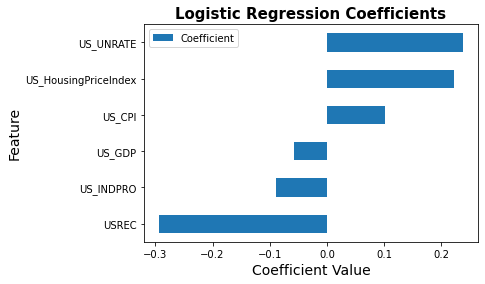

In [74]:
# Assuming you have already trained the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], features, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient')

plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title('Logistic Regression Coefficients',fontsize=15, fontweight='bold')
plt.xlabel('Coefficient Value',fontsize=14)
plt.ylabel('Feature',fontsize=14)
plt.show()